In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_stats

subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
#subjects = ['001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

In [18]:
np.array([
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "ECOG"')["r2_con"],
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "ECOG"')["r2_ips"]
    ]).mean(axis=0)

array([0.47895925, 0.18216129, 0.1328159 , 0.0736612 , 0.09594196,
       0.00892676, 0.09323032, 0.01485709, 0.03687695, 0.03345567,
       0.0279391 ])

In [21]:
df_plt =  pd.DataFrame({
    "ECoG_per" : np.array([
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "ECOG"')["r2_con"],
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "ECOG"')["r2_ips"]
    ]).mean(axis=0),
    "STN_per" : np.array([
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "STN"')["r2_con"],
        df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "STN"')["r2_ips"]
    ]).mean(axis=0),
    "UPDRS_total" : list(df_all.groupby(["sub", "loc"]).mean().reset_index().query('loc == "ECOG"')["UPDRS_total"])
})

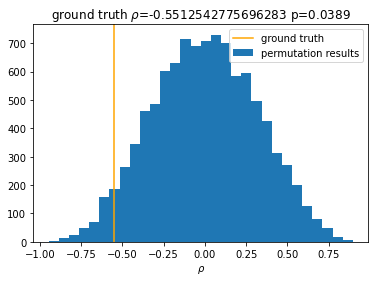

In [22]:
rho_ECOG, p_val_ECOG = icn_stats.permutationTestSpearmansRho(df_plt["ECoG_per"], df_plt["UPDRS_total"], True,r"$\rho$", 10000)

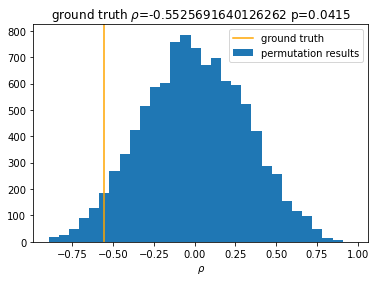

In [23]:
rho_STN, p_val_STN = icn_stats.permutationTestSpearmansRho(df_plt["STN_per"], df_plt["UPDRS_total"], True,r"$\rho$", 10000)

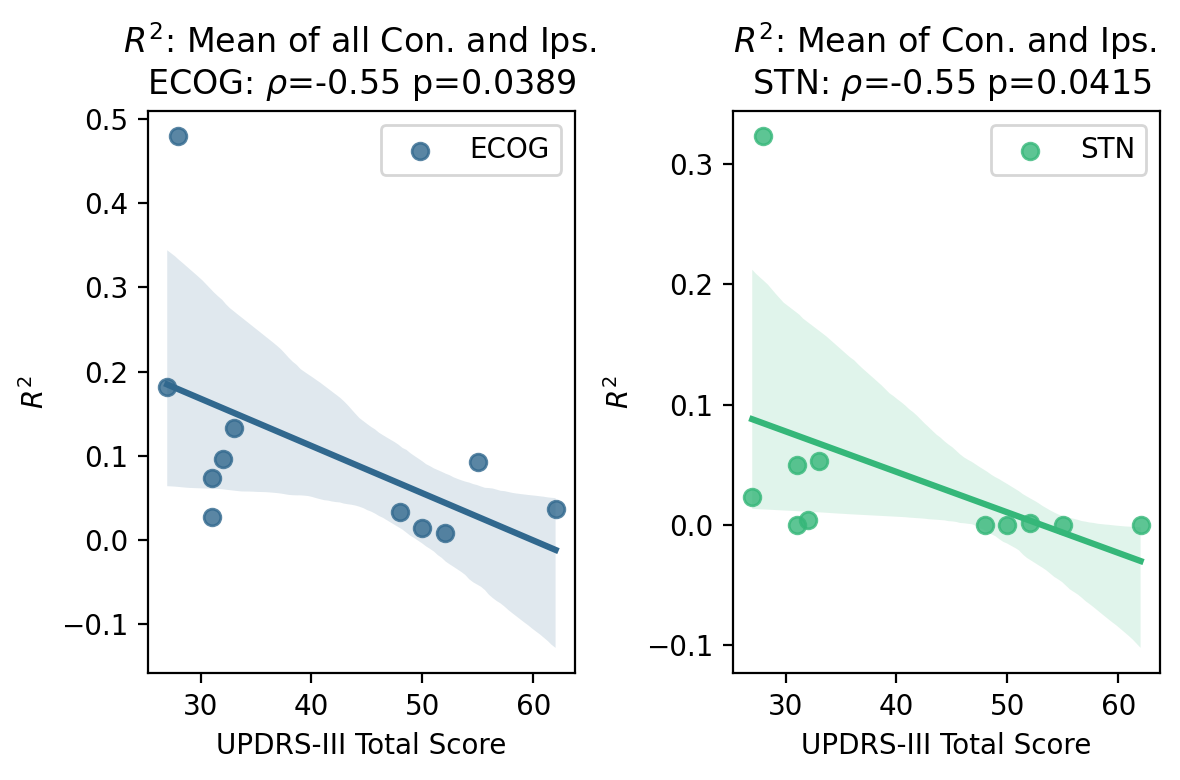

In [25]:
plt.figure(figsize=(6,4), dpi=200)
plt.subplot(121)
sns.regplot(x="UPDRS_total", y="ECoG_per", data=df_plt, color=(49/255,104/255,142/255), label="ECOG")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of all Con. and Ips. \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG))

plt.subplot(122)
sns.regplot(x="UPDRS_total", y="STN_per", data=df_plt,  color=(53/255,183/255,121/255), label="STN")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. \n"+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))
plt.tight_layout()
plt.savefig("Figure 5 - UPDRS Corr.pdf", bbox_inches='tight', dpi=300)


In [17]:
df_all = df_all[df_all["sub"]!=0]

### UPDRS total

In [4]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
    
print(stats.spearmanr(per_, pred_))
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)#np.arctanh(np.array(per_))
df_comp_ECOG["pred"] = pred_
model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     3.463
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0957
Time:                        16:10:42   Log-Likelihood:                 8.7784
No. Observations:                  11   AIC:                            -13.56
Df Residuals:                       9   BIC:                            -12.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [5]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5525691640126262, pvalue=0.07793082878582444)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Thu, 17 Mar 2022   Prob (F-statistic):              0.170
Time:                        16:10:43   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


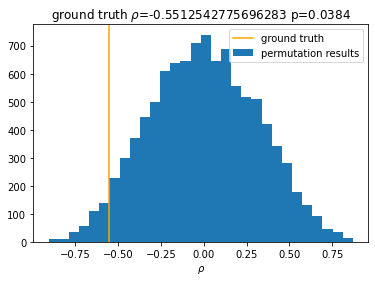

In [6]:
rho_ECOG, p_val_ECOG = icn_stats.permutationTestSpearmansRho(df_comp_ECOG["r2"], df_comp_ECOG["pred"], True,r"$\rho$", 10000)

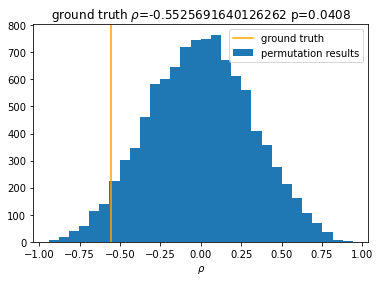

In [7]:
rho_STN, p_val_STN = icn_stats.permutationTestSpearmansRho(df_comp_STN["r2"], df_comp_STN["pred"], True,r"$\rho$", 10000)

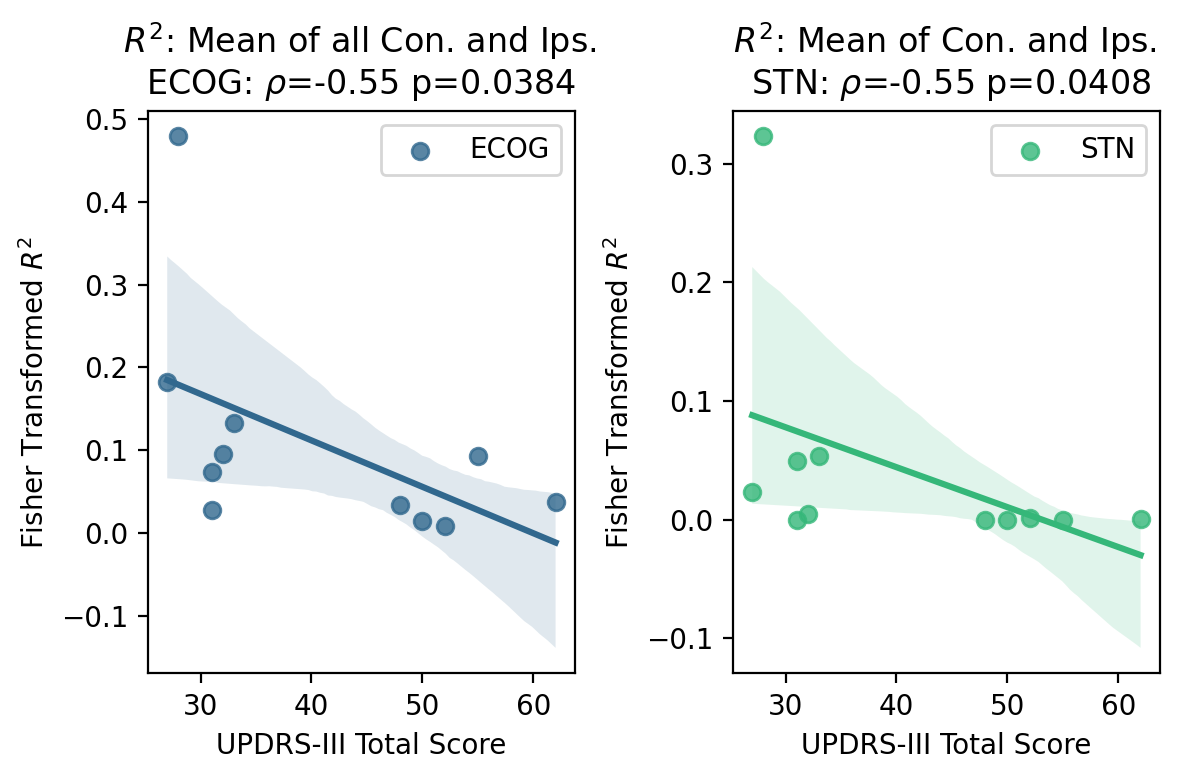

In [8]:
plt.figure(figsize=(6,4), dpi=200)
plt.subplot(121)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(49/255,104/255,142/255), label="ECOG")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of all Con. and Ips. \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG))

plt.subplot(122)
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(53/255,183/255,121/255), label="STN")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. \n"+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))
plt.tight_layout()

### now compare lateral specific scores

In [40]:
df_best_ECOG_CON = df_best_ECOG_CON[df_best_ECOG_CON["sub"] != 0]
df_best_ECOG_IPS = df_best_ECOG_IPS[df_best_ECOG_IPS["sub"] != 0]

df_best_STN_CON = df_best_STN_CON[df_best_STN_CON["sub"] != 0]
df_best_STN_IPS = df_best_STN_IPS[df_best_STN_IPS["sub"] != 0]

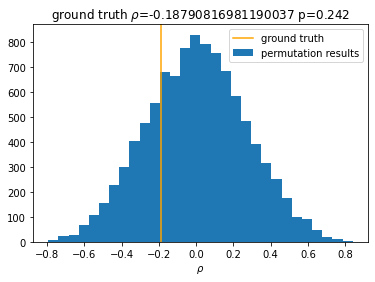

In [42]:
rho_ECOG_CON, p_val_ECOG_CON = icn_stats.permutationTestSpearmansRho(df_best_ECOG_CON["r2_con"],\
                        df_best_ECOG_CON["UPDRS_rigidity_upper_extrimity_contralateral"]+
                        df_best_ECOG_CON["UPDRS_combined_akinesia_rigidty_ipsilateral"],
                        True,r"$\rho$", 10000)

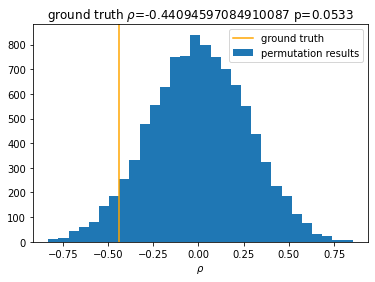

In [43]:
rho_STN_CON, p_val_STN_CON = icn_stats.permutationTestSpearmansRho(df_best_STN_CON["r2_con"],\
                        df_best_STN_CON["UPDRS_rigidity_upper_extrimity_contralateral"]+
                        df_best_STN_CON["UPDRS_combined_akinesia_rigidty_ipsilateral"],
                                                                   True,r"$\rho$", 10000)

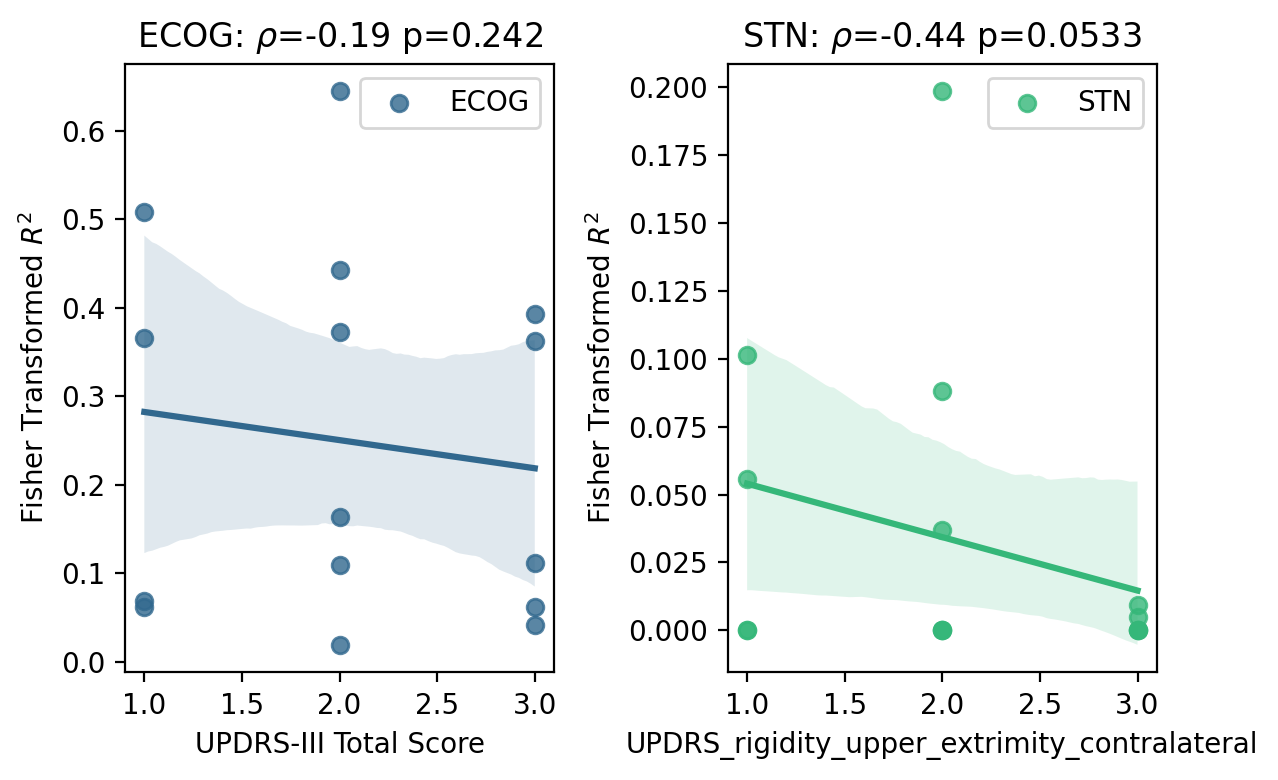

In [44]:
plt.figure(figsize=(6,4), dpi=200)
plt.subplot(121)
sns.regplot(x="UPDRS_rigidity_upper_extrimity_contralateral", y="r2_con",
            data=df_best_ECOG_CON, color=(49/255,104/255,142/255), label="ECOG")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG_CON,2))+" p=" +str(p_val_ECOG_CON))

plt.subplot(122)
sns.regplot(x="UPDRS_rigidity_upper_extrimity_contralateral", y="r2_con",
            data=df_best_STN_CON,  color=(53/255,183/255,121/255), label="STN")
plt.legend()
plt.xlabel("UPDRS_rigidity_upper_extrimity_contralateral")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("STN: "r"$\rho$"+"="+str(np.round(rho_STN_CON,2))+" p=" +str(p_val_STN_CON))
plt.tight_layout()

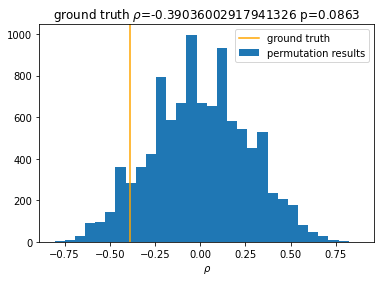

In [48]:
rho_ECOG_IPS, p_val_ECOG_IPS = icn_stats.permutationTestSpearmansRho(df_best_ECOG_IPS["r2_ips"],\
                        df_best_ECOG_IPS["UPDRS_rigidity_upper_extrimity_ipsilateral"], True,r"$\rho$", 10000)

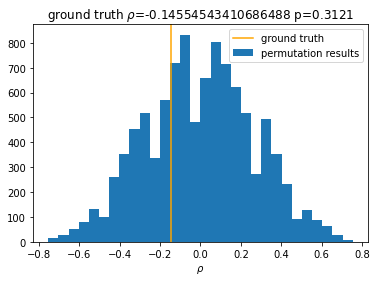

In [47]:
rho_STN_IPS, p_val_STN_IPS = icn_stats.permutationTestSpearmansRho(df_best_STN_IPS["r2_ips"],\
                        df_best_STN_IPS["UPDRS_rigidity_upper_extrimity_ipsilateral"], True,r"$\rho$", 10000)

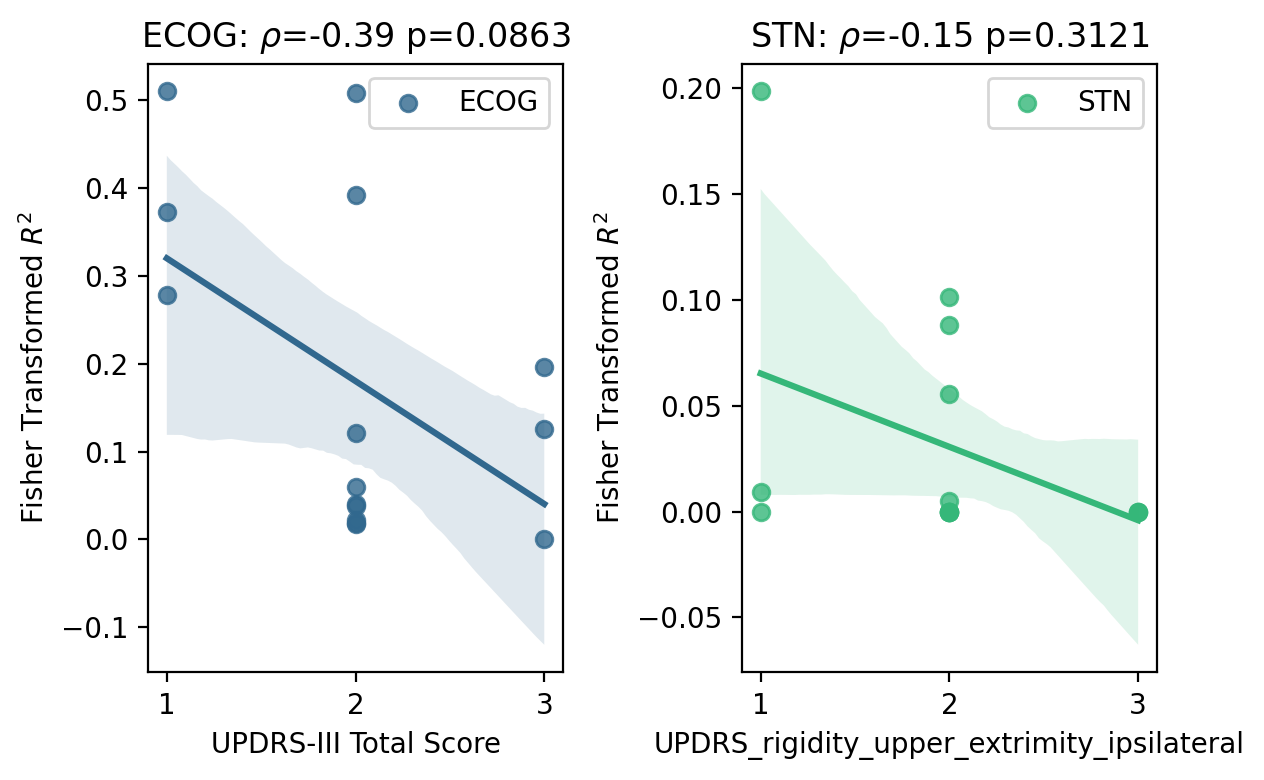

In [49]:
plt.figure(figsize=(6,4), dpi=200)
plt.subplot(121)
sns.regplot(x="UPDRS_rigidity_upper_extrimity_ipsilateral", y="r2_con",
            data=df_best_ECOG_IPS, color=(49/255,104/255,142/255), label="ECOG")
plt.legend()
plt.xlabel("UPDRS-III Total Score")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG_IPS,2))+" p=" +str(p_val_ECOG_IPS))

plt.subplot(122)
sns.regplot(x="UPDRS_rigidity_upper_extrimity_ipsilateral", y="r2_con",
            data=df_best_STN_IPS,  color=(53/255,183/255,121/255), label="STN")
plt.legend()
plt.xlabel("UPDRS_rigidity_upper_extrimity_ipsilateral")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("STN: "r"$\rho$"+"="+str(np.round(rho_STN_IPS,2))+" p=" +str(p_val_STN_IPS))
plt.tight_layout()

### Now estimate correlations with age, disease duration, gender

In [9]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_stats

subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
subjects = ['001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [10]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)
df_patient_demo = pd.read_csv("patient_specifics.csv", delimiter=";", index_col=0)

In [11]:
df_patient_demo

,Gender,UPDRS total,Hemisphere,Age,Movements,Disease duration [years],ECoG Strip Contact Number Left,ECoG Strip Contact Number Right
N,,,,,,,,
0,Male,28,R,60.3,128,10.7,0,6
1,Male,27,L+R,51.2,464,14.0,28,28
2,Male,33,L+R,53.8,213,7.2,8,8
3,Male,31,L+R,44.2,285,10.1,8,8
4,Male,32,2L+2R,63.6,381,13.1,28+8,28+8
5,Male,52,L,59.6,84,5.9,6,0
6,Male,55,L,71.6,161,1.4,6,0
7,Male,50,L,52.5,131,8.7,6,0
8,Male,62,L+R,66.8,547,9.8,6,6


In [32]:
np.unique(df_all["sub"].values).shape

(11,)

In [35]:
len(subjects)

11

In [37]:
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']

df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)#np.arctanh(np.array(per_))
df_comp_ECOG["pred"] = pred_


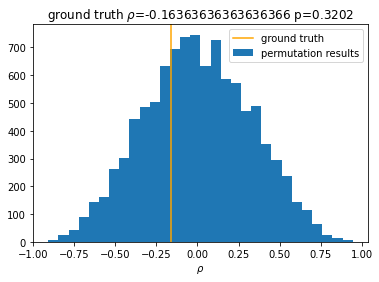

In [38]:
rho_AGE, p_val_AGE = icn_stats.permutationTestSpearmansRho(
                np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["Age"]), True,r"$\rho$", 10000)

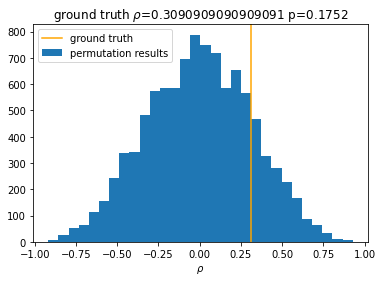

In [45]:
rho_DiseaseDuration, p_val_DiseaseDuration = icn_stats.permutationTestSpearmansRho(
                np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["Disease duration [years]"]), True,r"$\rho$", 10000)

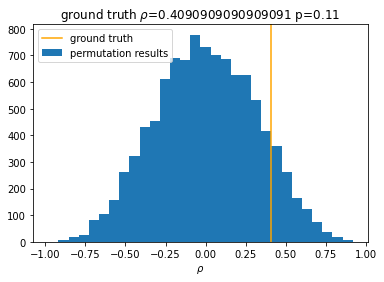

In [39]:
rho_MOVEMENTS, p_val_MOVEMENTS = icn_stats.permutationTestSpearmansRho(
                np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["Movements"]), True,r"$\rho$", 10000)

In [48]:
np.array(df_comp_ECOG["r2"])

array([0.47895925, 0.18216129, 0.1328159 , 0.0736612 , 0.09594196,
       0.00892676, 0.09323032, 0.01485709, 0.03687695, 0.03345567,
       0.0279391 ])

In [49]:
np.array(df_patient_demo["UPDRS total"])

array([28, 27, 33, 31, 32, 52, 55, 50, 62, 48, 31], dtype=int64)

In [51]:
np.array(df_comp_STN["r2"])

array([0.32286789, 0.02342832, 0.05323166, 0.0496904 , 0.00430018,
       0.00153155, 0.        , 0.        , 0.00041132, 0.        ,
       0.        ])

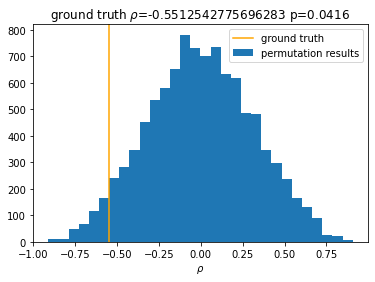

In [42]:
rho_UPDRS_TOTAL, p_val_UPDRS_TOTAL = icn_stats.permutationTestSpearmansRho(
                np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["UPDRS total"]), True,r"$\rho$", 10000)

In [6]:
import pingouin as pg

In [14]:
pg.corr(np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["UPDRS total"]), method="percbend")

,n,r,CI95%,p-val,power
percbend,11,-0.62266,"[-0.89, -0.04]",0.040743,0.571936


In [17]:
pg.corr(np.array(df_comp_ECOG["r2"]),\
                    np.array(df_patient_demo["UPDRS total"]), method="percbend")

,n,r,CI95%,p-val,power
percbend,11,-0.62266,"[-0.89, -0.04]",0.040743,0.571936


In [18]:
pg.corr(np.array(df_comp_STN["r2"]),\
                    np.array(df_patient_demo["UPDRS total"]), method="percbend")

,n,r,CI95%,p-val,power
percbend,11,-0.700693,"[-0.92, -0.17]",0.016319,0.721185
